In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py as h5
import awkward as ak
import matplotlib
from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter
import atlas_mpl_style as ampl

In [2]:
f = h5.File("/share/lazy/ekauffma/NewXY/2Trk/ATLAS_PVFinderData_TruthMatched.h5", mode = "r")

In [3]:
totalNumBins = 12000
zMax=240
zMin=-240
binwidth = (zMax-zMin)/totalNumBins
zvals = np.linspace(zMin, zMax, totalNumBins, endpoint=False) + binwidth/2
zbins = np.linspace(zMin,zMax,totalNumBins)
bins_1mm = totalNumBins/(zMax - zMin)

In [4]:
mystyle = {
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "font.size": 18,
    "xtick.major.width": 2,
    "ytick.major.width": 2,
}

styles = {
    "kernel": dict(alpha=0.5, color="g"),
    "kernelb": dict(alpha=0.5, color="purple"),
    "target": dict(alpha=0.6, color="b"),
    "predicted": dict(alpha=0.6, color="r"),
    "masked": dict(alpha=0.3, color="k"),
}

def get_color(style):
    color = style.get("color")
    if color is None:
        color = style.get("edgecolor")
    if color is None:
        color = "k"
    return color

In [5]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

In [6]:
evtnum = 30

kdea_fullcov = np.array(f["poca_KDE_A_zdata"][f"Event{evtnum}"])
kdeb_fullcov = np.array(f["poca_KDE_B_zdata"][f"Event{evtnum}"])
xmax_fullcov = np.array(f["poca_KDE_A_xmax"][f"Event{evtnum}"])
ymax_fullcov = np.array(f["poca_KDE_A_ymax"][f"Event{evtnum}"])
pv_loc_x_fullcov = np.array(f["pv_loc_x"][f"Event{evtnum}"])
pv_loc_y_fullcov = np.array(f["pv_loc_y"][f"Event{evtnum}"])
pv_loc_z_fullcov = np.array(f["pv_loc_z"][f"Event{evtnum}"])
pv_ntracks_fullcov = np.array(f["pv_ntracks"][f"Event{evtnum}"])
pv_loc_x_fullcov = pv_loc_x_fullcov[pv_ntracks_fullcov>=2]
pv_loc_y_fullcov = pv_loc_y_fullcov[pv_ntracks_fullcov>=2]
pv_loc_z_fullcov = pv_loc_z_fullcov[pv_ntracks_fullcov>=2]
pv_ntracks_fullcov = pv_ntracks_fullcov[pv_ntracks_fullcov>=2]

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


-1.98
8.02
x = -0.4993423819541931, y = -0.5072716474533081, z = 1.0946056842803955
9.0

x = -0.5116147398948669, y = -0.5000701546669006, z = 3.401427984237671
13.0

x = -0.5021215081214905, y = -0.5080048441886902, z = 2.77175235748291
11.0

x = -0.49214592576026917, y = -0.5106315612792969, z = -0.06094522774219513
10.0

x = -0.4999363124370575, y = -0.5182352662086487, z = 5.369926452636719
8.0

x = -0.5116316676139832, y = -0.4995787739753723, z = 1.4726518392562866
2.0



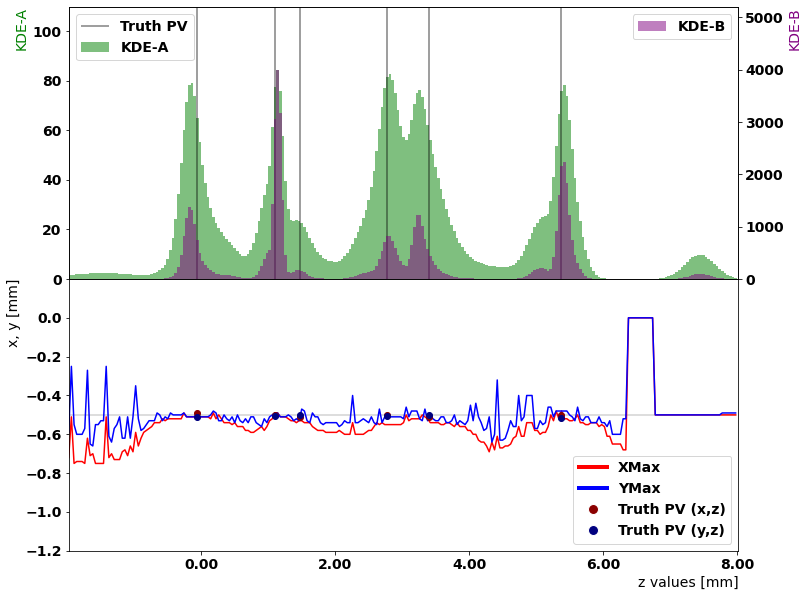

In [7]:
startind = 5950
endind = 6200

fig, axs = plt.subplots(2,1, figsize=(12,10), sharex=True)
fig.patch.set_facecolor('white')
axs[0].xaxis.set_major_formatter(FormatStrFormatter("%.2f"))
axs[0].bar(zvals[startind:endind], kdea_fullcov[startind:endind], width=binwidth, **styles["kernel"], label="KDE-A")
axs[0].vlines(pv_loc_z_fullcov,0,1.7*max(kdea_fullcov[startind:endind]),color='k',alpha=0.5)

ax_prob = axs[0].twinx()
p = ax_prob.bar(zvals[startind:endind], kdeb_fullcov[startind:endind], width=binwidth, **styles["kernelb"], label="KDE-B")
ax_prob.set_ylabel("KDE-B", color=get_color(styles["kernelb"]),horizontalalignment='right', y=1.0)
axs[0].set_ylabel("KDE-A", color=get_color(styles["kernel"]),horizontalalignment='right', y=1.0)
axs[0].legend(["Truth PV","KDE-A"], loc="upper left")
ax_prob.legend(loc="upper right")
axs[0].set_xlim([zvals[startind],zvals[endind]])
axs[0].set_ylim([0,1.3*max(kdea_fullcov[startind:endind])])
ax_prob.set_ylim([0,1.3*max(kdeb_fullcov[startind:endind])])

axs[1].plot(zvals[startind:endind],-0.5*np.ones(endind-startind),'lightgray')
axs[1].plot(zvals[startind:endind],xmax_fullcov[startind:endind],'r-',label="XMax")
axs[1].plot(zvals[startind:endind],ymax_fullcov[startind:endind],'b-',label="YMax")
axs[1].plot(pv_loc_z_fullcov,pv_loc_x_fullcov,'o',color='darkred')
axs[1].plot(pv_loc_z_fullcov,pv_loc_y_fullcov,'o',color='navy')
axs[1].set_xlabel("z values [mm]", horizontalalignment='right', x=1.0)
axs[1].set_ylabel("x, y [mm]", horizontalalignment='right', y=1.0)
custom_lines = [Line2D([0], [0], color='r', lw=4),
                Line2D([0], [0], color='b', lw=4),
                Line2D([], [], color="white", markersize=10, marker='o', markerfacecolor="darkred"),
                Line2D([], [], color="white", markersize=10, marker='o', markerfacecolor="navy")]
axs[1].legend(custom_lines, ['XMax', 'YMax', 'Truth PV (x,z)', 'Truth PV (y,z)'], loc="lower right")
axs[1].set_yticks([-1.2,-1,-0.8,-0.6,-0.4,-0.2,0])
axs[1].set_ylim([-1.2,0.2])

print(zvals[startind])
print(zvals[endind])
for i in range(len(pv_loc_z_fullcov)):
    if pv_loc_z_fullcov[i]>zvals[startind] and pv_loc_z_fullcov[i]<zvals[endind]:
        print(f"x = {pv_loc_x_fullcov[i]}, y = {pv_loc_y_fullcov[i]}, z = {pv_loc_z_fullcov[i]}")
        print(pv_ntracks_fullcov[i])
        print()
fig.subplots_adjust(wspace=0, hspace=0)
plt.show()